# Bitcoin Market Sentiment vs Trader Performance

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Module Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Data Loading

In [3]:
HD = pd.read_csv("historical_data.csv")

In [4]:
HD.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
FVG = pd.read_csv("fear_greed_index.csv")
FVG.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


# Data Cleaning for HD(Historical dataset)

In [6]:
HD.shape

(18608, 16)

In [7]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18608 entries, 0 to 18607
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           18608 non-null  object 
 1   Coin              18608 non-null  object 
 2   Execution Price   18608 non-null  float64
 3   Size Tokens       18608 non-null  float64
 4   Size USD          18608 non-null  float64
 5   Side              18608 non-null  object 
 6   Timestamp IST     18608 non-null  object 
 7   Start Position    18608 non-null  float64
 8   Direction         18608 non-null  object 
 9   Closed PnL        18607 non-null  float64
 10  Transaction Hash  18607 non-null  object 
 11  Order ID          18607 non-null  float64
 12  Crossed           18607 non-null  object 
 13  Fee               18607 non-null  float64
 14  Trade ID          18607 non-null  float64
 15  Timestamp         18607 non-null  float64
dtypes: float64(9), object(7)
memory usage: 2

In [8]:
HD.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [9]:
HD_1 = HD.drop(['Transaction Hash','Order ID','Trade ID'] , axis = 'columns')
HD_1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,True,0.345404,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,True,0.005600,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,True,0.050431,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,True,0.050043,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,True,0.003055,1.730000e+12


In [10]:
HD_1[['Timestamp IST','Timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18608 entries, 0 to 18607
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp IST  18608 non-null  object 
 1   Timestamp      18607 non-null  float64
dtypes: float64(1), object(1)
memory usage: 290.9+ KB


In [11]:
pd.to_datetime(HD_1['Timestamp IST'],errors= 'coerce').head()

,Timestamp IST
0,2024-02-12 22:50:00
1,2024-02-12 22:50:00
2,2024-02-12 22:50:00
3,2024-02-12 22:50:00
4,2024-02-12 22:50:00


In [12]:
HD_1['time'] = pd.to_datetime(HD_1['Timestamp'],unit = 'ms')
HD_1[['Timestamp','time','Timestamp IST']].head()

,Timestamp,time,Timestamp IST
0,1.730000e+12,2024-10-27 03:33:20,02-12-2024 22:50
1,1.730000e+12,2024-10-27 03:33:20,02-12-2024 22:50
2,1.730000e+12,2024-10-27 03:33:20,02-12-2024 22:50
3,1.730000e+12,2024-10-27 03:33:20,02-12-2024 22:50
4,1.730000e+12,2024-10-27 03:33:20,02-12-2024 22:50


In [13]:
HD_2 = HD_1.drop(['Timestamp'],axis = 'columns')

In [14]:
HD_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18608 entries, 0 to 18607
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Account          18608 non-null  object        
 1   Coin             18608 non-null  object        
 2   Execution Price  18608 non-null  float64       
 3   Size Tokens      18608 non-null  float64       
 4   Size USD         18608 non-null  float64       
 5   Side             18608 non-null  object        
 6   Timestamp IST    18608 non-null  object        
 7   Start Position   18608 non-null  float64       
 8   Direction        18608 non-null  object        
 9   Closed PnL       18607 non-null  float64       
 10  Crossed          18607 non-null  object        
 11  Fee              18607 non-null  float64       
 12  time             18607 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 1.8+ MB


In [15]:
HD_2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,time
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,True,0.345404,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,True,0.005600,2024-10-27 03:33:20
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,True,0.050431,2024-10-27 03:33:20
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,True,0.050043,2024-10-27 03:33:20
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,True,0.003055,2024-10-27 03:33:20


In [16]:
HD_2.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,1


In [17]:
HD_2 = HD_2[HD_2['Size USD']>0]

In [18]:
HD_2 = HD_2.drop_duplicates()

In [19]:
HD_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18608 entries, 0 to 18607
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Account          18608 non-null  object        
 1   Coin             18608 non-null  object        
 2   Execution Price  18608 non-null  float64       
 3   Size Tokens      18608 non-null  float64       
 4   Size USD         18608 non-null  float64       
 5   Side             18608 non-null  object        
 6   Timestamp IST    18608 non-null  object        
 7   Start Position   18608 non-null  float64       
 8   Direction        18608 non-null  object        
 9   Closed PnL       18607 non-null  float64       
 10  Crossed          18607 non-null  object        
 11  Fee              18607 non-null  float64       
 12  time             18607 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 1.8+ MB


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
HD_2['Coin'] = le.fit_transform(HD_2['Coin'])
HD_2['Side'] = le.fit_transform(HD_2['Side'])
HD_2['Direction'] = le.fit_transform(HD_2['Direction'])
HD_2['Account'] = le.fit_transform(HD_2['Account'])
HD_2['Crossed'] = le.fit_transform(HD_2['Crossed'])

In [22]:
HD_2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,time
0,4,0,7.9769,986.87,7872.16,0,02-12-2024 22:50,0.000000,1,0.0,1,0.345404,2024-10-27 03:33:20
1,4,0,7.9800,16.00,127.68,0,02-12-2024 22:50,986.524596,1,0.0,1,0.005600,2024-10-27 03:33:20
2,4,0,7.9855,144.09,1150.63,0,02-12-2024 22:50,1002.518996,1,0.0,1,0.050431,2024-10-27 03:33:20
3,4,0,7.9874,142.98,1142.04,0,02-12-2024 22:50,1146.558564,1,0.0,1,0.050043,2024-10-27 03:33:20
4,4,0,7.9894,8.73,69.75,0,02-12-2024 22:50,1289.488521,1,0.0,1,0.003055,2024-10-27 03:33:20


In [58]:
HD_2['Timestamp IST'] = pd.to_datetime(HD_2['Timestamp IST'],dayfirst = True)
HD_2['date'] = HD_2['Timestamp IST'].dt.date
HD_2['date'] = pd.to_datetime(HD_2['date'])
HD_2['date'] = HD_2['date'].dt.strftime('%d-%m-%Y')
HD_2.head()
HD_2.to_csv('HD Processed file.csv',index = False)

# Data Cleaning for FearVsGreed Datasets

In [24]:
FVG.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


In [25]:
FVG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [26]:
FVG.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [27]:
FVG.duplicated().sum()

np.int64(0)

In [28]:
FVG['time'] = pd.to_datetime(FVG['timestamp'], unit = 's')

In [29]:
FVG['classification'] = le.fit_transform(FVG['classification'])

In [30]:
FVG_1=FVG.drop(['timestamp'],axis = 'columns')

In [57]:
FVG_1.head()
FVG_1.to_csv('FVG Processed File.csv',index=False)

# Merging datasets

In [55]:
df = HD_2.merge(FVG_1[['date','classification','value']],
                  on='date',
                  how='left')
df.to_csv("merged_data.csv", index=False)

In [33]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,time,date,classification,value
0,4,0,7.9769,986.87,7872.16,0,2024-12-02 22:50:00,0.000000,1,0.0,1,0.345404,2024-10-27 03:33:20,02-12-2024,1.0,80.0
1,4,0,7.9800,16.00,127.68,0,2024-12-02 22:50:00,986.524596,1,0.0,1,0.005600,2024-10-27 03:33:20,02-12-2024,1.0,80.0
2,4,0,7.9855,144.09,1150.63,0,2024-12-02 22:50:00,1002.518996,1,0.0,1,0.050431,2024-10-27 03:33:20,02-12-2024,1.0,80.0
3,4,0,7.9874,142.98,1142.04,0,2024-12-02 22:50:00,1146.558564,1,0.0,1,0.050043,2024-10-27 03:33:20,02-12-2024,1.0,80.0
4,4,0,7.9894,8.73,69.75,0,2024-12-02 22:50:00,1289.488521,1,0.0,1,0.003055,2024-10-27 03:33:20,02-12-2024,1.0,80.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18608 entries, 0 to 18607
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Account          18608 non-null  int64         
 1   Coin             18608 non-null  int64         
 2   Execution Price  18608 non-null  float64       
 3   Size Tokens      18608 non-null  float64       
 4   Size USD         18608 non-null  float64       
 5   Side             18608 non-null  int64         
 6   Timestamp IST    18608 non-null  datetime64[ns]
 7   Start Position   18608 non-null  float64       
 8   Direction        18608 non-null  int64         
 9   Closed PnL       18607 non-null  float64       
 10  Crossed          18608 non-null  int64         
 11  Fee              18607 non-null  float64       
 12  time             18607 non-null  datetime64[ns]
 13  date             18608 non-null  object        
 14  classification   18602 non-null  float

In [35]:
df.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,1


In [36]:
df = df.dropna(subset = ['classification','value'])

In [37]:
df.shape

(18602, 16)

# Feature creation

In [38]:
df['Win'] = df['Closed PnL']>0
df['trade hrs'] = df['Timestamp IST'].dt.hour
df['day_of_week'] = df['Timestamp IST'].dt.day_name()
df['date'] = pd.to_datetime(df['date'],dayfirst = True)
df['trade day'] = df['date'].dt.day
df['trade month'] = df['date'].dt.month
df['trade year'] = df['date'].dt.year

In [39]:
df[['day_of_week','trade hrs','trade day','trade month','trade year']]

,day_of_week,trade hrs,trade day,trade month,trade year
0,Monday,22,2,12,2024
1,Monday,22,2,12,2024
2,Monday,22,2,12,2024
3,Monday,22,2,12,2024
4,Monday,22,2,12,2024
...,...,...,...,...,...
18603,Wednesday,6,12,2,2025
18604,Wednesday,6,12,2,2025
18605,Wednesday,6,12,2,2025
18606,Wednesday,6,12,2,2025


In [40]:
df.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,1


In [41]:
df['day_of_week'] = le.fit_transform(df['day_of_week'])
df['Win'] = le.fit_transform(df['Win'])

In [42]:
df['day_of_week']

,day_of_week
0,1
1,1
2,1
3,1
4,1
...,...
18603,6
18604,6
18605,6
18606,6


In [43]:
df_1 = df.drop(['time','date'],axis = 1)

In [44]:
df_1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,classification,value,Win,trade hrs,day_of_week,trade day,trade month,trade year
0,4,0,7.9769,986.87,7872.16,0,2024-12-02 22:50:00,0.000000,1,0.0,1,0.345404,1.0,80.0,0,22,1,2,12,2024
1,4,0,7.9800,16.00,127.68,0,2024-12-02 22:50:00,986.524596,1,0.0,1,0.005600,1.0,80.0,0,22,1,2,12,2024
2,4,0,7.9855,144.09,1150.63,0,2024-12-02 22:50:00,1002.518996,1,0.0,1,0.050431,1.0,80.0,0,22,1,2,12,2024
3,4,0,7.9874,142.98,1142.04,0,2024-12-02 22:50:00,1146.558564,1,0.0,1,0.050043,1.0,80.0,0,22,1,2,12,2024
4,4,0,7.9894,8.73,69.75,0,2024-12-02 22:50:00,1289.488521,1,0.0,1,0.003055,1.0,80.0,0,22,1,2,12,2024


# EDA

# Trade Count per Sentiment

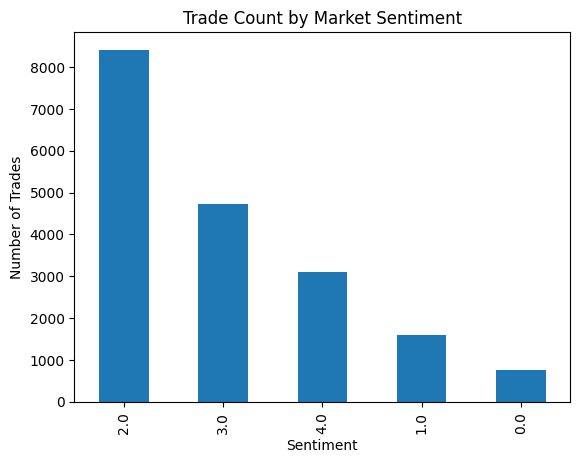

<Figure size 640x480 with 0 Axes>

In [45]:
df_1['classification'].value_counts().plot(kind='bar')
plt.title('Trade Count by Market Sentiment')  # to understand how trading varies across market sentiment
plt.xlabel('Sentiment')
plt.ylabel('Number of Trades')
plt.show()
plt.savefig('Trade Count per sentiment.png')

# Average PnL vs Sentiments

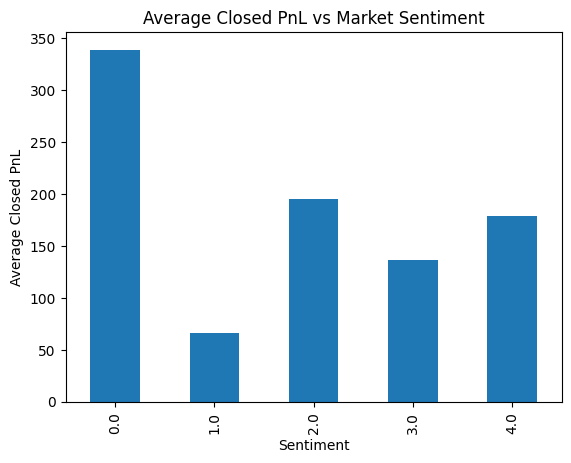

<Figure size 640x480 with 0 Axes>

In [46]:
df_1.groupby('classification')['Closed PnL'].mean().plot(kind='bar')
plt.title('Average Closed PnL vs Market Sentiment')  # to analuze how profitability changes under different sentiment conditions.
plt.xlabel('Sentiment')
plt.ylabel('Average Closed PnL')
plt.show()
plt.savefig('average_pnl vs Sentiment.png')

# PnL Distribution vs Sentiment

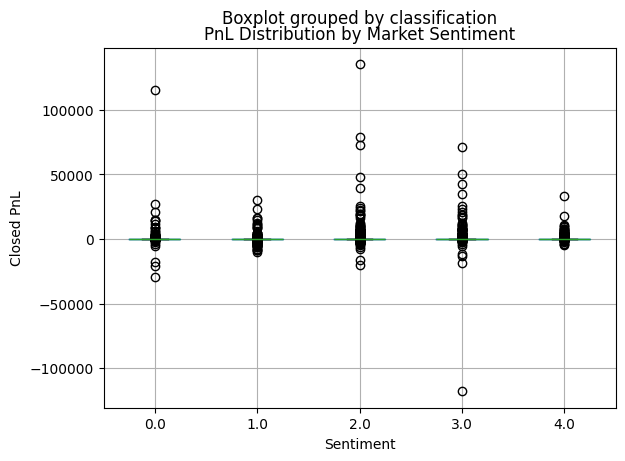

In [47]:
df_1.boxplot(column = 'Closed PnL',by='classification')
plt.title('PnL Distribution by Market Sentiment')
plt.xlabel('Sentiment')  # to study profit variability and riak across sentiment regimes
plt.ylabel('Closed PnL')
plt.show()
plt.show('pnl Distribution vs Sentiment.png')

# Win rate Vs Sentiment

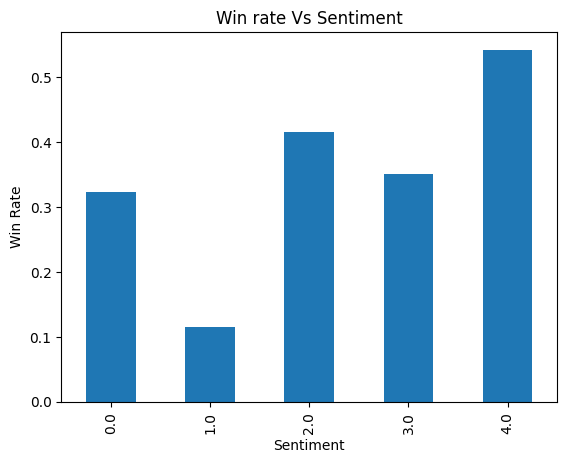

<Figure size 640x480 with 0 Axes>

In [48]:
df_1.groupby('classification')['Win'].mean().plot(kind = 'bar')
plt.title('Win rate Vs Sentiment')
plt.xlabel('Sentiment')    # to evaluate trade success probability under different sentiments.
plt.ylabel('Win Rate')
plt.show()
plt.savefig('Win rate vs Sentiment.png')

# Win Vs Sentiment

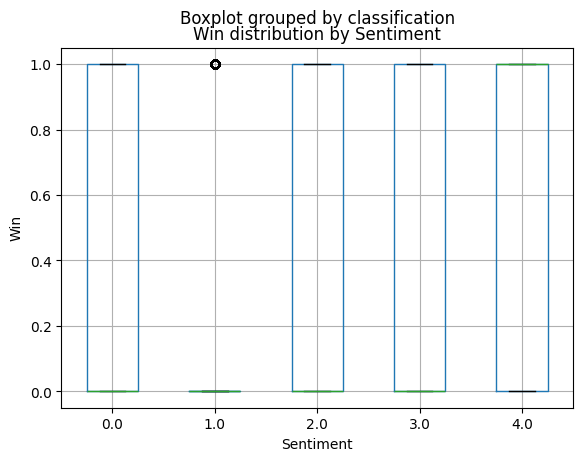

<Figure size 640x480 with 0 Axes>

In [49]:
df_1.boxplot(column = 'Win',by = 'classification')
plt.title('Win distribution by Sentiment')
plt.xlabel('Sentiment')   # to analyze how trade success varies across different market sentiment regimes.
plt.ylabel('Win')
plt.show()
plt.savefig('Win Vs Sentiment.png')

# Average Trade Size Vs Sentiment

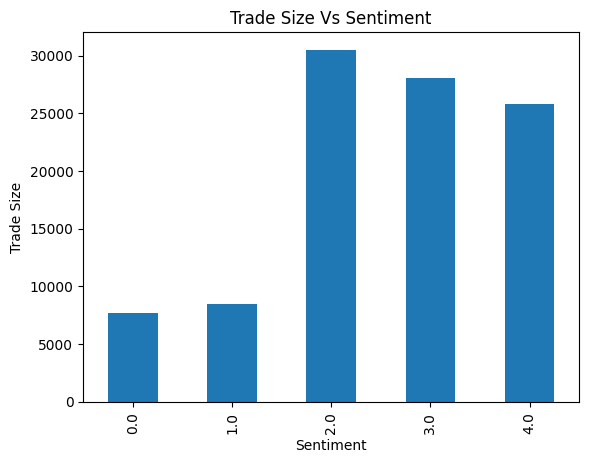

<Figure size 640x480 with 0 Axes>

In [50]:
df_1.groupby('classification')['Size USD'].mean().plot(kind = 'bar')
plt.title('Trade Size Vs Sentiment')
plt.xlabel('Sentiment')                  # to understand how trader risk exposure changes under different market sentiment
plt.ylabel('Trade Size')
plt.show()
plt.savefig('Average Trade vs Sentiment.png')

# Trade Size Vs Sentiment

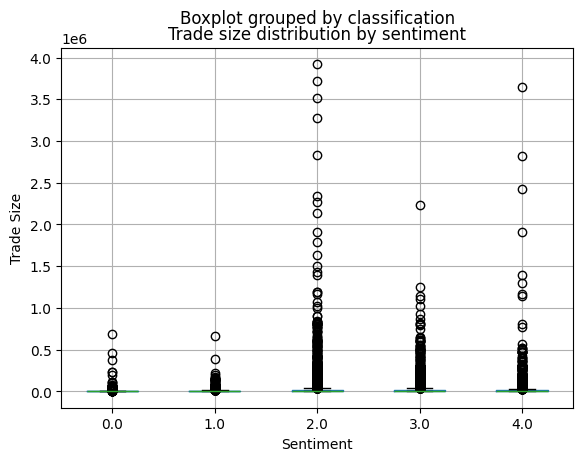

<Figure size 640x480 with 0 Axes>

In [51]:
df_1.boxplot(column = 'Size USD' , by = 'classification')
plt.title('Trade size distribution by sentiment')
plt.xlabel('Sentiment')      # To assess changes in risk-taking behavior
plt.ylabel('Trade Size')
plt.show()
plt.savefig('Trade Size vs Setiment.png')

# Buy vs Sell Behavior by Sentiment

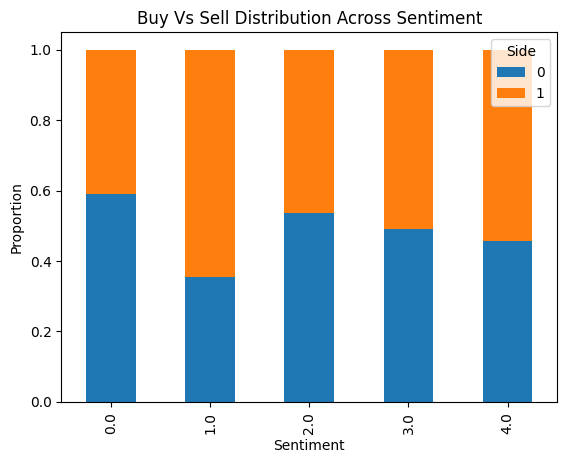

<Figure size 640x480 with 0 Axes>

In [52]:
side_sentiment = pd.crosstab(df_1['classification'],df_1['Side'],normalize='index')
side_sentiment.plot(kind='bar',stacked=True)
plt.title('Buy Vs Sell Distribution Across Sentiment')
plt.xlabel('Sentiment')     # To understand directional bias under dufferent sentiments.
plt.ylabel('Proportion')
plt.show()
plt.savefig('Buy vs Sell Behavior By Sentiment.png')

# Correlation PLot

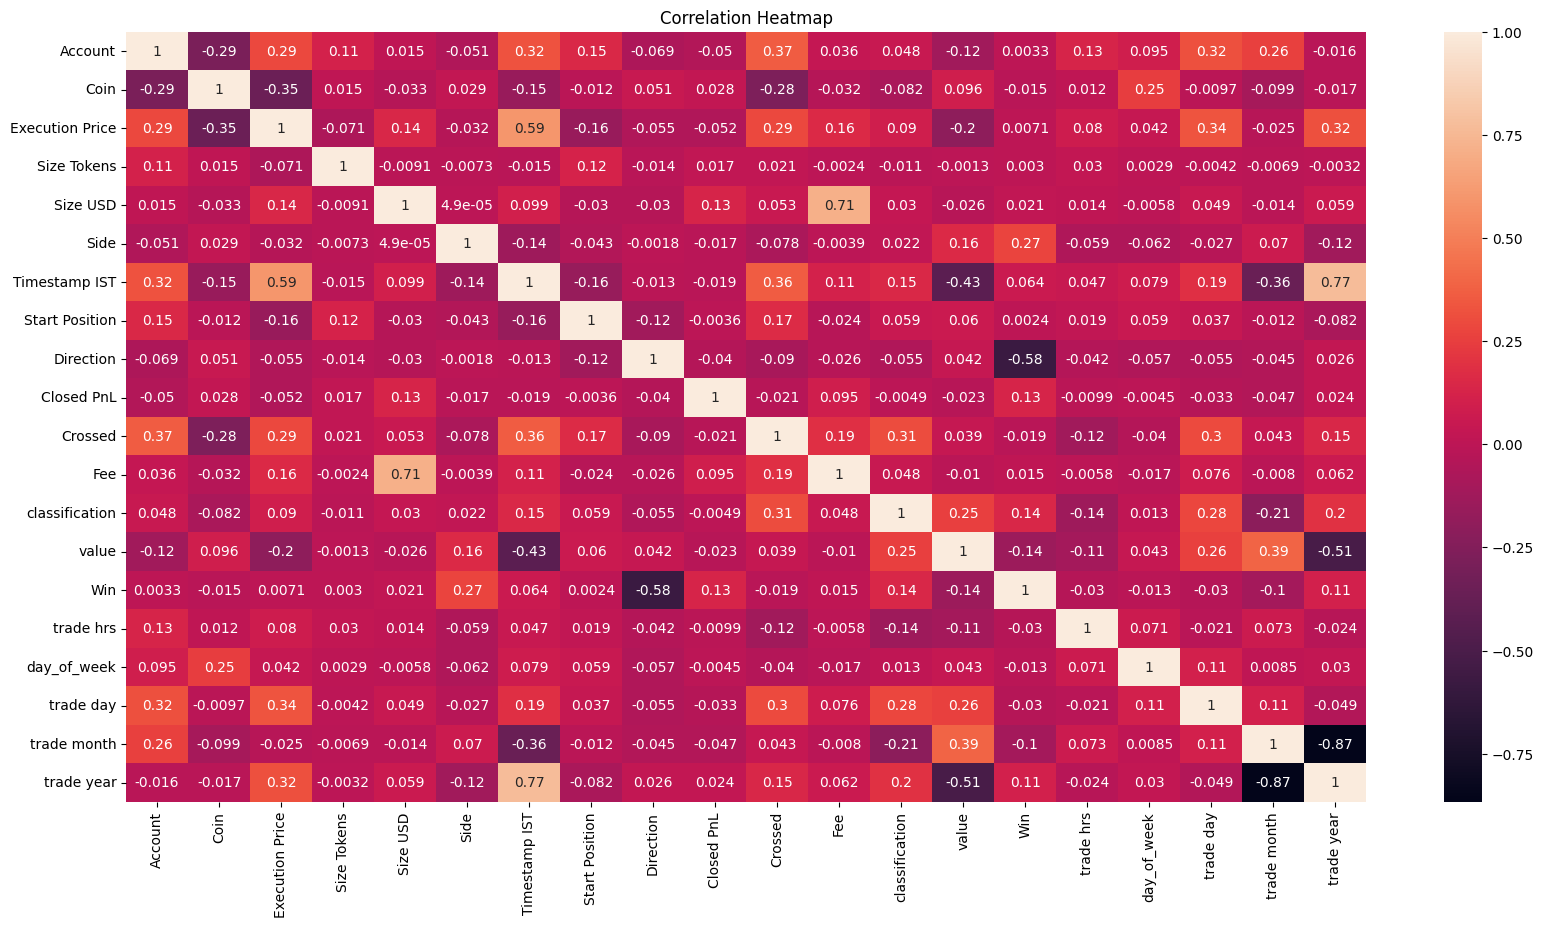

<Figure size 640x480 with 0 Axes>

In [53]:
corr = df_1.corr()
plt.figure(figsize=(20,10))
sn.heatmap(corr,annot=True)    # To understand relationship between numeric variables.
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('Correlation.png')